# 01 - MovieLens 25M Data Exploration

This notebook explores the MovieLens 25M dataset to understand:
- Dataset structure and size
- Rating distributions
- User behavior patterns
- Movie popularity
- Data quality and completeness
- Temporal patterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Configuration

In [3]:
# Load project config
project_root = Path.cwd().parent
config_path = project_root / 'config' / 'config.yaml'

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# Data paths
raw_dir = project_root / config['data']['raw_dir'] / 'ml-25m'
print(f"Data directory: {raw_dir}")
print(f"Directory exists: {raw_dir.exists()}")

Data directory: c:\Users\ololi\StudioProjects\movie-recommender\data\raw\ml-25m
Directory exists: True


## 2. Load Raw Data

In [4]:
# Load ratings
print("Loading ratings.csv...")
ratings = pd.read_csv(raw_dir / 'ratings.csv')
print(f"✓ Loaded {len(ratings):,} ratings")

# Load movies
print("\nLoading movies.csv...")
movies = pd.read_csv(raw_dir / 'movies.csv')
print(f"✓ Loaded {len(movies):,} movies")

# Load tags
print("\nLoading tags.csv...")
tags = pd.read_csv(raw_dir / 'tags.csv')
print(f"✓ Loaded {len(tags):,} tags")

# Load links
print("\nLoading links.csv...")
links = pd.read_csv(raw_dir / 'links.csv')
print(f"✓ Loaded {len(links):,} links")

Loading ratings.csv...
✓ Loaded 25,000,095 ratings

Loading movies.csv...
✓ Loaded 62,423 movies

Loading tags.csv...
✓ Loaded 1,093,360 tags

Loading links.csv...
✓ Loaded 62,423 links


## 3. Dataset Overview

In [5]:
print("=" * 60)
print("MOVIELENS 25M DATASET OVERVIEW")
print("=" * 60)

n_ratings = len(ratings)
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_total_movies = len(movies)

print(f"\nRatings: {n_ratings:,}")
print(f"Users: {n_users:,}")
print(f"Rated Movies: {n_movies:,}")
print(f"Total Movies in Catalog: {n_total_movies:,}")
print(f"Tags: {len(tags):,}")

# Sparsity
sparsity = 1 - (n_ratings / (n_users * n_movies))
print(f"\nMatrix Sparsity: {sparsity:.2%}")
print(f"Matrix Density: {(1-sparsity):.2%}")

# Average ratings
avg_ratings_per_user = n_ratings / n_users
avg_ratings_per_movie = n_ratings / n_movies
print(f"\nAvg ratings per user: {avg_ratings_per_user:.1f}")
print(f"Avg ratings per movie: {avg_ratings_per_movie:.1f}")

MOVIELENS 25M DATASET OVERVIEW

Ratings: 25,000,095
Users: 162,541
Rated Movies: 59,047
Total Movies in Catalog: 62,423
Tags: 1,093,360

Matrix Sparsity: 99.74%
Matrix Density: 0.26%

Avg ratings per user: 153.8
Avg ratings per movie: 423.4


## 4. Inspect Data Structure

In [6]:
print("\n📊 RATINGS DataFrame:")
print(ratings.head())
print(f"\nShape: {ratings.shape}")
print(f"Memory: {ratings.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print("\nData types:")
print(ratings.dtypes)
print("\nMissing values:")
print(ratings.isnull().sum())


📊 RATINGS DataFrame:
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

Shape: (25000095, 4)
Memory: 762.9 MB

Data types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
print("\n🎬 MOVIES DataFrame:")
print(movies.head())
print(f"\nShape: {movies.shape}")
print("\nData types:")
print(movies.dtypes)
print("\nMissing values:")
print(movies.isnull().sum())


🎬 MOVIES DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Shape: (62423, 3)

Data types:
movieId     int64
title      object
genres     object
dtype: object

Missing values:
movieId    0
title      0
genres     0
dtype: int64


## 5. Rating Distribution Analysis

Rating Statistics:
count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


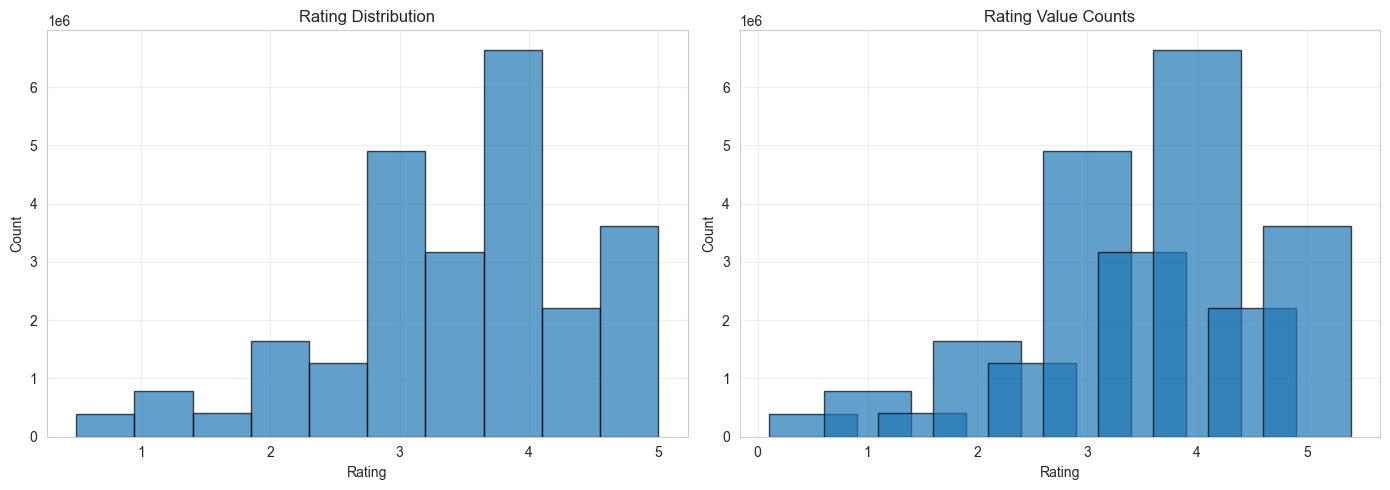


Rating Percentages:
rating
0.5     1.57
1.0     3.11
1.5     1.60
2.0     6.56
2.5     5.05
3.0    19.59
3.5    12.71
4.0    26.56
4.5     8.80
5.0    14.45
Name: proportion, dtype: float64


In [8]:
# Rating statistics
print("Rating Statistics:")
print(ratings['rating'].describe())

# Rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Rating Distribution')
axes[0].grid(True, alpha=0.3)

# Value counts
rating_counts = ratings['rating'].value_counts().sort_index()
axes[1].bar(rating_counts.index, rating_counts.values, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Rating Value Counts')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Percentage breakdown
print("\nRating Percentages:")
print((ratings['rating'].value_counts(normalize=True).sort_index() * 100).round(2))

## 6. User Behavior Analysis

User Activity Statistics:
count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
dtype: float64


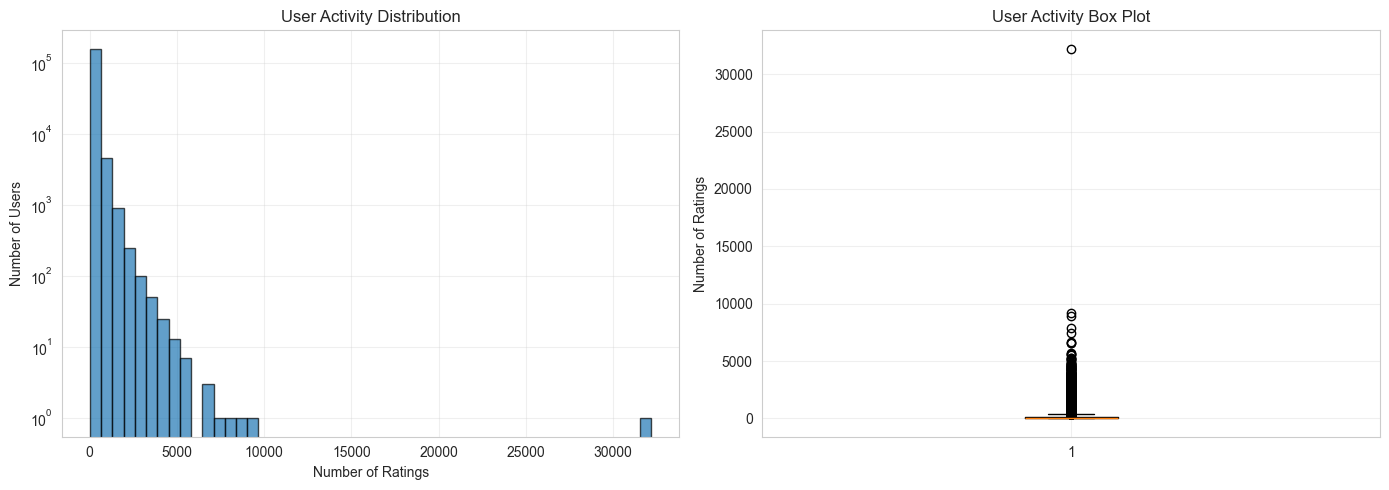


User Activity Percentiles:
10th percentile: 24 ratings
25th percentile: 36 ratings
50th percentile: 71 ratings
75th percentile: 162 ratings
90th percentile: 353 ratings
95th percentile: 554 ratings
99th percentile: 1228 ratings


In [9]:
# Ratings per user
user_rating_counts = ratings.groupby('userId').size()

print("User Activity Statistics:")
print(user_rating_counts.describe())

# Visualize user activity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (log scale)
axes[0].hist(user_rating_counts, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('User Activity Distribution')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(user_rating_counts, vert=True)
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('User Activity Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# User percentiles
print("\nUser Activity Percentiles:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    val = np.percentile(user_rating_counts, p)
    print(f"{p}th percentile: {val:.0f} ratings")

## 7. Movie Popularity Analysis

Movie Popularity Statistics:
count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
dtype: float64


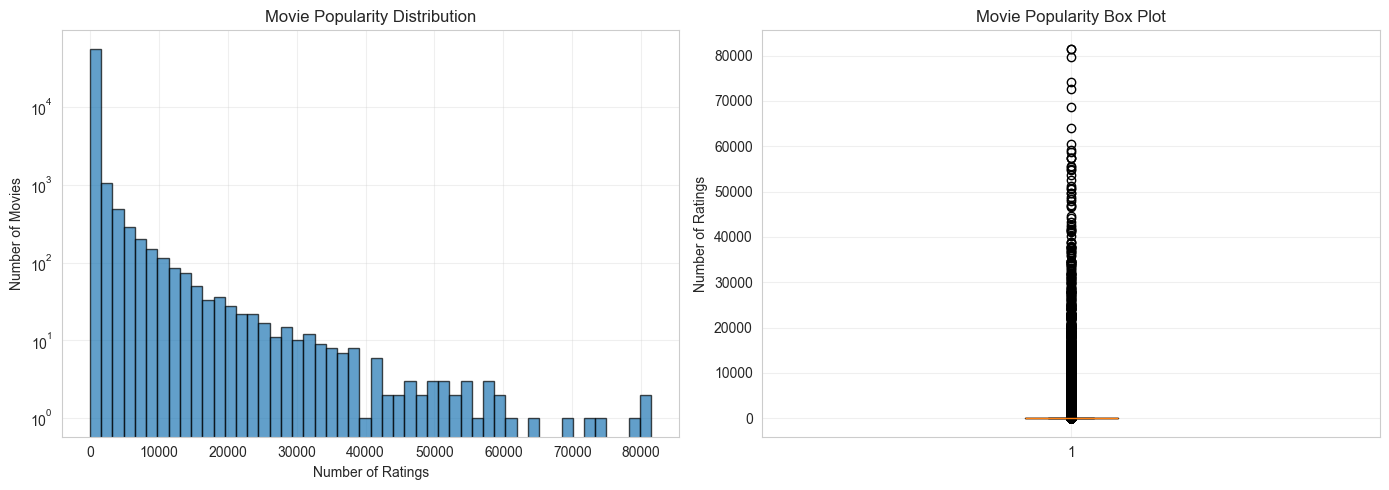


Movie Popularity Percentiles:
10th percentile: 1 ratings
25th percentile: 2 ratings
50th percentile: 6 ratings
75th percentile: 36 ratings
90th percentile: 413 ratings
95th percentile: 1503 ratings
99th percentile: 9942 ratings


In [10]:
# Ratings per movie
movie_rating_counts = ratings.groupby('movieId').size()

print("Movie Popularity Statistics:")
print(movie_rating_counts.describe())

# Visualize movie popularity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (log scale)
axes[0].hist(movie_rating_counts, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Movie Popularity Distribution')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(movie_rating_counts, vert=True)
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Movie Popularity Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Movie percentiles
print("\nMovie Popularity Percentiles:")
for p in percentiles:
    val = np.percentile(movie_rating_counts, p)
    print(f"{p}th percentile: {val:.0f} ratings")

## 8. Top Movies Analysis

In [11]:
# Most rated movies
most_rated = (
    ratings.groupby('movieId')
    .agg({
        'rating': ['count', 'mean']
    })
    .reset_index()
)
most_rated.columns = ['movieId', 'count', 'avg_rating']
most_rated = most_rated.merge(movies[['movieId', 'title']], on='movieId')
most_rated = most_rated.sort_values('count', ascending=False)

print("\n🏆 Top 20 Most Rated Movies:")
print(most_rated.head(20).to_string(index=False))

# Highest rated movies (min 100 ratings)
min_ratings = 100
highly_rated = most_rated[most_rated['count'] >= min_ratings].copy()
highly_rated = highly_rated.sort_values('avg_rating', ascending=False)

print(f"\n⭐ Top 20 Highest Rated Movies (min {min_ratings} ratings):")
print(highly_rated.head(20).to_string(index=False))


🏆 Top 20 Most Rated Movies:
 movieId  count  avg_rating                                                                          title
     356  81491    4.048011                                                            Forrest Gump (1994)
     318  81482    4.413576                                               Shawshank Redemption, The (1994)
     296  79672    4.188912                                                            Pulp Fiction (1994)
     593  74127    4.151342                                               Silence of the Lambs, The (1991)
    2571  72674    4.154099                                                             Matrix, The (1999)
     260  68717    4.120189                                      Star Wars: Episode IV - A New Hope (1977)
     480  64144    3.679175                                                           Jurassic Park (1993)
     527  60411    4.247579                                                        Schindler's List (1993)
     110

## 9. Temporal Analysis

Temporal Coverage:
First rating: 1995-01-09 11:46:49
Last rating: 2019-11-21 09:15:03
Time span: 24.9 years


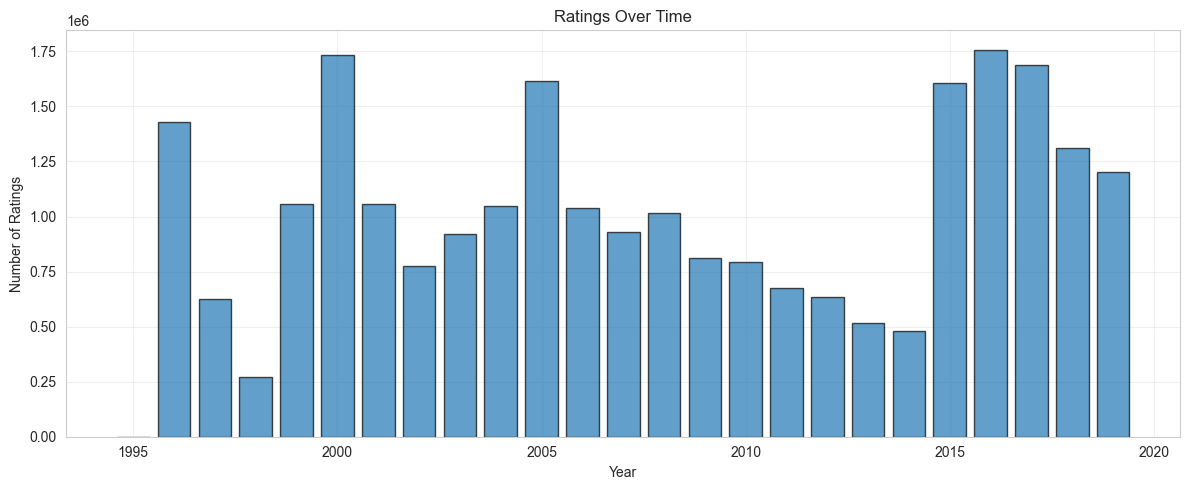


Ratings by Year:
year
1995          3
1996    1430093
1997     626202
1998     272099
1999    1059080
2000    1735398
2001    1058750
2002     776654
2003     920295
2004    1048116
2005    1613550
2006    1038458
2007     931432
2008    1018001
2009     810127
2010     792436
2011     676498
2012     635208
2013     515684
2014     478270
2015    1604971
2016    1757440
2017    1689935
2018    1310761
2019    1200634
dtype: int64


In [12]:
# Convert timestamp to datetime
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year
ratings['month'] = ratings['datetime'].dt.to_period('M')

print("Temporal Coverage:")
print(f"First rating: {ratings['datetime'].min()}")
print(f"Last rating: {ratings['datetime'].max()}")
print(f"Time span: {(ratings['datetime'].max() - ratings['datetime'].min()).days / 365.25:.1f} years")

# Ratings over time
ratings_by_year = ratings.groupby('year').size()

plt.figure(figsize=(12, 5))
plt.bar(ratings_by_year.index, ratings_by_year.values, alpha=0.7, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Ratings Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRatings by Year:")
print(ratings_by_year)

## 10. Genre Analysis

Genre Distribution:
             genre  count
             Drama  25606
            Comedy  16870
          Thriller   8654
           Romance   7719
            Action   7348
            Horror   5989
       Documentary   5605
             Crime   5319
(no genres listed)   5062
         Adventure   4145
            Sci-Fi   3595
          Children   2935
         Animation   2929
           Mystery   2925
           Fantasy   2731
               War   1874
           Western   1399
           Musical   1054
         Film-Noir    353
              IMAX    195


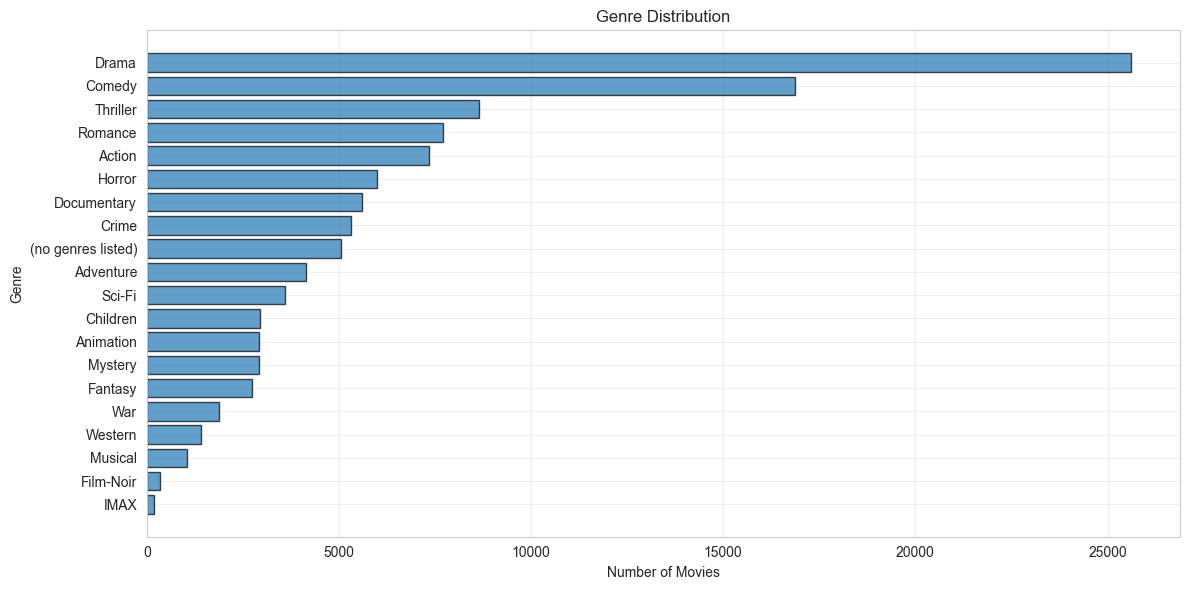

In [13]:
# Extract genres
movies['genres_list'] = movies['genres'].str.split('|')

# Count genres
from collections import Counter
all_genres = []
for genres in movies['genres_list']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values('count', ascending=False)

print("Genre Distribution:")
print(genre_df.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(genre_df['genre'], genre_df['count'], alpha=0.7, edgecolor='black')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Data Quality Assessment

In [14]:
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values
print("\n1. Missing Values:")
print(f"  Ratings: {ratings.isnull().sum().sum()}")
print(f"  Movies: {movies.isnull().sum().sum()}")
print(f"  Tags: {tags.isnull().sum().sum()}")

# Duplicate ratings
duplicates = ratings.duplicated(subset=['userId', 'movieId']).sum()
print(f"\n2. Duplicate Ratings: {duplicates}")

# Movies without ratings
rated_movie_ids = set(ratings['movieId'].unique())
all_movie_ids = set(movies['movieId'].unique())
unrated_movies = len(all_movie_ids - rated_movie_ids)
print(f"\n3. Movies Without Ratings: {unrated_movies} ({unrated_movies/len(movies)*100:.1f}%)")

# Rating value validity
valid_ratings = ratings['rating'].between(0.5, 5.0)
invalid_count = (~valid_ratings).sum()
print(f"\n4. Invalid Ratings (not in 0.5-5.0 range): {invalid_count}")

# Users with single rating
single_rating_users = (user_rating_counts == 1).sum()
print(f"\n5. Users with Only 1 Rating: {single_rating_users} ({single_rating_users/len(user_rating_counts)*100:.1f}%)")

# Movies with single rating
single_rating_movies = (movie_rating_counts == 1).sum()
print(f"\n6. Movies with Only 1 Rating: {single_rating_movies} ({single_rating_movies/len(movie_rating_counts)*100:.1f}%)")

print("\n" + "=" * 60)
print("✓ Data quality check complete!")
print("=" * 60)

DATA QUALITY ASSESSMENT

1. Missing Values:
  Ratings: 0
  Movies: 0
  Tags: 16

2. Duplicate Ratings: 0

3. Movies Without Ratings: 3376 (5.4%)

4. Invalid Ratings (not in 0.5-5.0 range): 0

5. Users with Only 1 Rating: 0 (0.0%)

6. Movies with Only 1 Rating: 10298 (17.4%)

✓ Data quality check complete!


## 12. Summary

In [16]:
print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

print(f"\n1. Dataset Scale:")
print(f"   - {n_ratings:,} ratings from {n_users:,} users on {n_movies:,} movies")
print(f"   - Matrix is {sparsity:.2%} sparse")

print(f"\n2. Rating Patterns:")
print(f"   - Most common rating: {ratings['rating'].mode()[0]}")
print(f"   - Average rating: {ratings['rating'].mean():.2f}")
print(f"   - Rating scale: {ratings['rating'].min()} to {ratings['rating'].max()}")

print(f"\n3. User Behavior:")
print(f"   - Median user has rated {user_rating_counts.median():.0f} movies")
print(f"   - Most active user: {user_rating_counts.max()} ratings")

print(f"\n4. Movie Popularity:")
print(f"   - Median movie has {movie_rating_counts.median():.0f} ratings")
print(f"   - Most popular movie: {movie_rating_counts.max()} ratings")

print(f"\n5. Data Quality:")
print(f"   - Clean dataset with minimal missing values")
print(f"   - No duplicate ratings found")
print(f"   - All ratings in valid range")


KEY INSIGHTS

1. Dataset Scale:
   - 25,000,095 ratings from 162,541 users on 59,047 movies
   - Matrix is 99.74% sparse

2. Rating Patterns:
   - Most common rating: 4.0
   - Average rating: 3.53
   - Rating scale: 0.5 to 5.0

3. User Behavior:
   - Median user has rated 71 movies
   - Most active user: 32202 ratings

4. Movie Popularity:
   - Median movie has 6 ratings
   - Most popular movie: 81491 ratings

5. Data Quality:
   - Clean dataset with minimal missing values
   - No duplicate ratings found
   - All ratings in valid range
